<a href="https://colab.research.google.com/github/Dharungit/ML_Projects/blob/main/Decision_Tree_Assignment_Dharun_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import graphviz 
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,export_text
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
tit = pd.read_csv('/content/drive/MyDrive/Datasets/titanic.csv')
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
le_sex, le_age = LabelEncoder(), LabelEncoder()

In [ ]:
tit['Sex_n'] = le_sex.fit_transform(tit['Sex'])
tit['Age_n'] = le_sex.fit_transform(tit['Age'])
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_n,Age_n
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,28
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,34
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,47
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,35
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,24
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,90
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,34


In [ ]:
tit = tit.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','Sex','Age'],axis=1)
tit.head()

,Survived,Pclass,Fare,Sex_n,Age_n
0,0,3,7.2500,1,28
1,1,1,71.2833,0,51
2,1,3,7.9250,0,34
3,1,1,53.1000,0,47
4,0,3,8.0500,1,47


In [ ]:
x = tit[['Pclass','Sex_n','Age_n','Fare']]
y = tit['Survived']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
x_train.shape

(712, 4)

In [ ]:
y_train.shape

(712,)

In [ ]:
clf = DecisionTreeClassifier(criterion = 'entropy',random_state=10,max_depth=3,min_samples_leaf=3)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0])

In [ ]:
accuracy_score(y_test,y_pred)*100

82.68156424581005

[Text(418.5, 475.65000000000003, 'X[1] <= 0.5\nentropy = 0.967\nsamples = 712\nvalue = [432, 280]'),
 Text(209.25, 339.75, 'X[0] <= 2.5\nentropy = 0.832\nsamples = 258\nvalue = [68, 190]'),
 Text(104.625, 203.85000000000002, 'X[3] <= 26.125\nentropy = 0.321\nsamples = 137\nvalue = [8, 129]'),
 Text(52.3125, 67.94999999999999, 'entropy = 0.523\nsamples = 51\nvalue = [6, 45]'),
 Text(156.9375, 67.94999999999999, 'entropy = 0.159\nsamples = 86\nvalue = [2, 84]'),
 Text(313.875, 203.85000000000002, 'X[3] <= 24.808\nentropy = 1.0\nsamples = 121\nvalue = [60, 61]'),
 Text(261.5625, 67.94999999999999, 'entropy = 0.97\nsamples = 98\nvalue = [39, 59]'),
 Text(366.1875, 67.94999999999999, 'entropy = 0.426\nsamples = 23\nvalue = [21, 2]'),
 Text(627.75, 339.75, 'X[0] <= 1.5\nentropy = 0.718\nsamples = 454\nvalue = [364, 90]'),
 Text(523.125, 203.85000000000002, 'X[3] <= 26.144\nentropy = 0.949\nsamples = 98\nvalue = [62, 36]'),
 Text(470.8125, 67.94999999999999, 'entropy = 0.0\nsamples = 9\nvalue

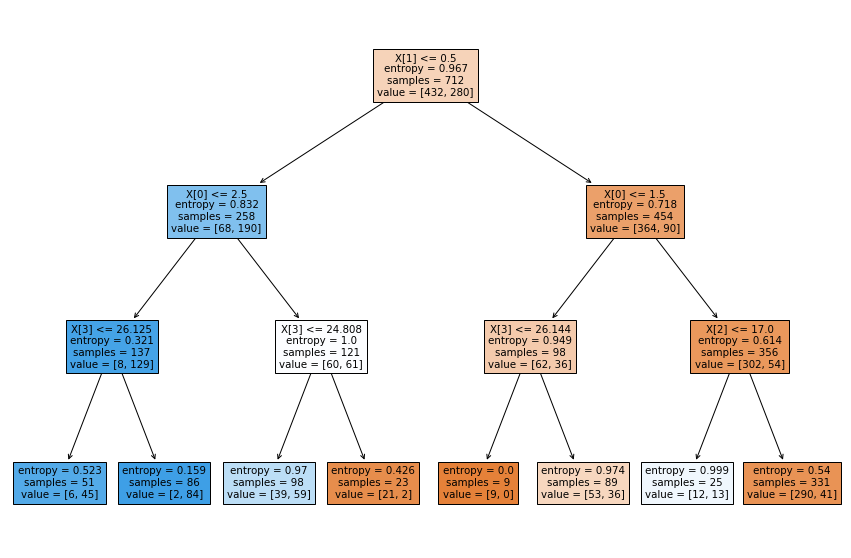

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True) 

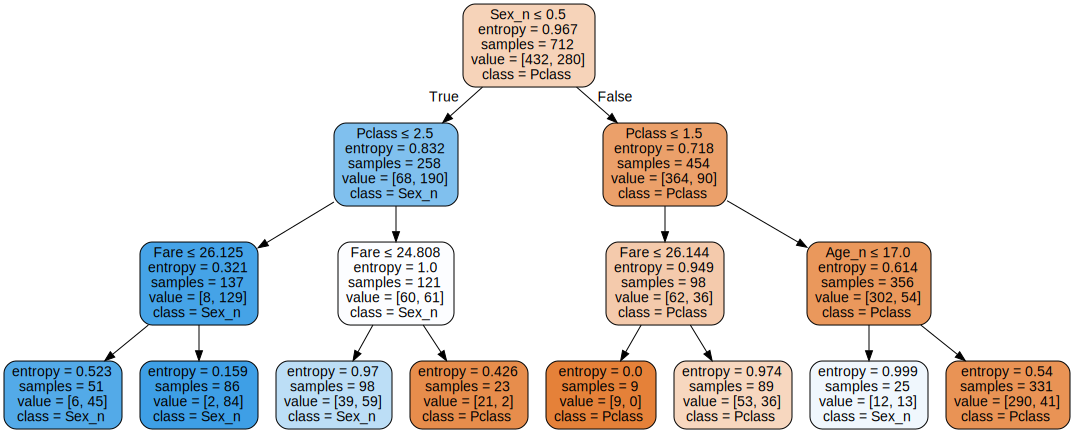

In [ ]:
 dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=x_test.columns,  
                     class_names=x_train.columns,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
r = export_text(clf)
print(r)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_3 <= 26.12
|   |   |   |--- class: 1
|   |   |--- feature_3 >  26.12
|   |   |   |--- class: 1
|   |--- feature_0 >  2.50
|   |   |--- feature_3 <= 24.81
|   |   |   |--- class: 1
|   |   |--- feature_3 >  24.81
|   |   |   |--- class: 0
|--- feature_1 >  0.50
|   |--- feature_0 <= 1.50
|   |   |--- feature_3 <= 26.14
|   |   |   |--- class: 0
|   |   |--- feature_3 >  26.14
|   |   |   |--- class: 0
|   |--- feature_0 >  1.50
|   |   |--- feature_2 <= 17.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  17.00
|   |   |   |--- class: 0

